In [360]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore") # hide warnings

In [361]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline
from datetime import datetime

In [362]:
df = pd.read_csv("15mindataCSV.csv")
print("="*50)
print("First Five Rows ","\n")
print(df.head(5),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

First Five Rows  

              Time  Flowrate (l/min)
0  2022-01-01 0:00               0.0
1  2022-01-01 0:15               0.0
2  2022-01-01 0:30               0.0
3  2022-01-01 0:45               0.0
4  2022-01-01 1:00               0.0 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              35040 non-null  object 
 1   Flowrate (l/min)  35040 non-null  float64
dtypes: float64(1), object(1)
memory usage: 547.6+ KB
None 

Describe the Dataset  

       Flowrate (l/min)
count      35040.000000
mean           3.125000
std            9.793984
min            0.000000
25%            0.000000
50%            0.000000
75%            2.200000
max          214.800000 

Null Values t  

Time                0
Flowrate (l/min)    0
dtype: int64 



In [363]:
# Extract all Data Like Year MOnth Day Time etc
df["Month"] = pd.to_datetime(df["Time"]).dt.month
df["Year"] = pd.to_datetime(df["Time"]).dt.year
df["Date"] = pd.to_datetime(df["Time"]).dt.date
df["Hour"] = pd.to_datetime(df["Time"]).dt.time
df["Week"] = pd.to_datetime(df["Time"]).dt.week
df["Day"] = pd.to_datetime(df["Time"]).dt.day_name()
df = df.set_index("Time")
df.index = pd.to_datetime(df.index)
#dataset["Time"] = pd.to_datetime(df["Time"]).dt.strftime("%Y %m %d %H %M")
print(dataset.head(-10))
print(df.info(),"\n")

                     Flowrate (l/min)  Month  Year        Date      Hour  \
Time                                                                       
2022-01-01 00:00:00               0.0      1  2022  2022-01-01  00:00:00   
2022-01-01 00:15:00               0.0      1  2022  2022-01-01  00:15:00   
2022-01-01 00:30:00               0.0      1  2022  2022-01-01  00:30:00   
2022-01-01 00:45:00               0.0      1  2022  2022-01-01  00:45:00   
2022-01-01 01:00:00               0.0      1  2022  2022-01-01  01:00:00   
...                               ...    ...   ...         ...       ...   
2022-12-31 20:15:00               0.0     12  2022  2022-12-31  20:15:00   
2022-12-31 20:30:00               3.6     12  2022  2022-12-31  20:30:00   
2022-12-31 20:45:00               0.0     12  2022  2022-12-31  20:45:00   
2022-12-31 21:00:00               5.8     12  2022  2022-12-31  21:00:00   
2022-12-31 21:15:00              11.4     12  2022  2022-12-31  21:15:00   

           

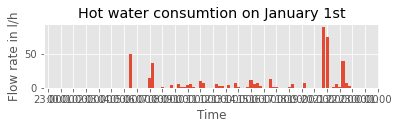

In [364]:
from matplotlib import style
import matplotlib.dates as md

fig = plt.figure()

ax1= fig.add_subplot(311)


style.use('ggplot')

January  = dataset.iloc[:,0:1]
January = January.loc['20220101':'20220101']

#plt.plot(January.index,January["Flowrate (l/min)"],  linewidth=2)
plt.bar(January.index,January["Flowrate (l/min)"],width=0.01)

plt.rcParams["figure.figsize"] = (20,10)
plt.title("Hot water consumtion on January 1st")
plt.xlabel("Time")
plt.ylabel("Flow rate in l/h")
plt.grid(True, alpha=1)
ax1.xaxis.set_major_locator(md.MinuteLocator(byminute = [0, 120]))
ax1.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))

#for label in ax1.xaxis.get_ticklabels():
    #label.set_rotation(90)



,Flowrate (l/min)
Time,
2022-01-01 00:00:00,0.0
2022-01-01 00:15:00,0.0
2022-01-01 00:30:00,0.0
2022-01-01 00:45:00,0.0
2022-01-01 01:00:00,0.0
...,...
2022-12-31 22:45:00,0.0
2022-12-31 23:00:00,0.0
2022-12-31 23:15:00,0.0


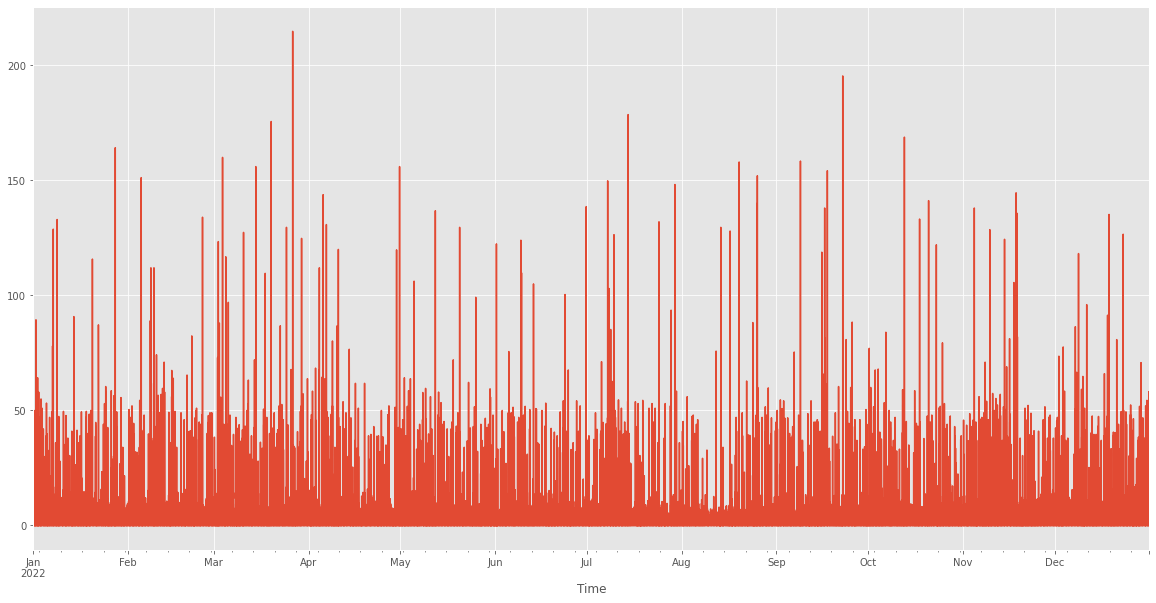

In [365]:
Flow = df['Flowrate (l/min)']
Flow.plot()
df = df.iloc[:,0:1]

df


In [366]:
from sklearn.preprocessing import FunctionTransformer

def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))


def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

#X_new = dataset.iloc[:,0:1]
df["Hour_of_day"] = df.index.hour



df["15min_sin"] = sin_transformer(24).fit_transform(df)["Hour_of_day"]
df["15min_cos"] = cos_transformer(24).fit_transform(df)["Hour_of_day"]
df

,Flowrate (l/min),Hour_of_day,15min_sin,15min_cos
Time,,,,
2022-01-01 00:00:00,0.0,0,0.000000,1.000000
2022-01-01 00:15:00,0.0,0,0.000000,1.000000
2022-01-01 00:30:00,0.0,0,0.000000,1.000000
2022-01-01 00:45:00,0.0,0,0.000000,1.000000
2022-01-01 01:00:00,0.0,1,0.258819,0.965926
...,...,...,...,...
2022-12-31 22:45:00,0.0,22,-0.500000,0.866025
2022-12-31 23:00:00,0.0,23,-0.258819,0.965926
2022-12-31 23:15:00,0.0,23,-0.258819,0.965926


In [367]:
df = df[['15min_sin', '15min_cos', 'Flowrate (l/min)']]
df = df.set_index(['15min_sin','15min_cos'])
#df.index = pd.to_datetime(df.index)
df

Flowrate (l/min)
15min_sin 15min_cos                  
 0.000000 1.000000                0.0
          1.000000                0.0
          1.000000                0.0
          1.000000                0.0
 0.258819 0.965926                0.0
...                               ...
-0.500000 0.866025                0.0
-0.258819 0.965926                0.0
          0.965926                0.0
          0.965926                0.0
          0.965926                0.0

[35040 rows x 1 columns]

In [368]:
WINDOW_SIZE = 1440

In [369]:
def df_to_X_y(df,window_size=1440):
    df_as_np=df.to_numpy()
    X = []
    y = []
    for i in range (len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [370]:
X,y=df_to_X_y(Flow,WINDOW_SIZE)
X.shape, y.shape

((33600, 1440, 1), (33600,))

In [371]:
X_train,y_train = X[:30000],y[:30000]
X_val,y_val = X[30000:32000],y[30000:32000]
X_test,y_test = X[32000:],y[32000:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((30000, 1440, 1),
 (30000,),
 (2000, 1440, 1),
 (2000,),
 (1600, 1440, 1),
 (1600,))

In [372]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam

model1 = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model1.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50))
model1.add(Dropout(0.2))

# Adding the output layer
model1.add(Dense(units = 8))
model1.add(Dense(units = 1))



In [373]:
model1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 1440, 50)          10400     
                                                                 
 dropout_36 (Dropout)        (None, 1440, 50)          0         
                                                                 
 lstm_37 (LSTM)              (None, 1440, 50)          20200     
                                                                 
 dropout_37 (Dropout)        (None, 1440, 50)          0         
                                                                 
 lstm_38 (LSTM)              (None, 1440, 50)          20200     
                                                                 
 dropout_38 (Dropout)        (None, 1440, 50)          0         
                                                                 
 lstm_39 (LSTM)              (None, 50)              

In [374]:
cp=ModelCheckpoint('model1/',save_best_only=True)
# Compiling the RNN
model1.compile(optimizer = Adam(), loss = MeanSquaredError(),metrics=[RootMeanSquaredError()])

In [375]:
model1.fit(X_train, y_train, validation_data=(X_val,y_val), epochs = 10, callbacks=[cp])

Epoch 1/10
938/938 [==============================] - ETA: 0s - loss: 95.5129 - root_mean_squared_error: 9.7731

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


938/938 [==============================] - 4063s 4s/step - loss: 95.5129 - root_mean_squared_error: 9.7731 - val_loss: 78.3877 - val_root_mean_squared_error: 8.8537
Epoch 2/10
938/938 [==============================] - ETA: 0s - loss: 94.3349 - root_mean_squared_error: 9.7126

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


938/938 [==============================] - 4393s 5s/step - loss: 94.3349 - root_mean_squared_error: 9.7126 - val_loss: 75.2918 - val_root_mean_squared_error: 8.6771
Epoch 3/10
938/938 [==============================] - 4708s 5s/step - loss: 93.3083 - root_mean_squared_error: 9.6596 - val_loss: 75.3549 - val_root_mean_squared_error: 8.6807
Epoch 4/10
938/938 [==============================] - 4708s 5s/step - loss: 93.0650 - root_mean_squared_error: 9.6470 - val_loss: 75.6050 - val_root_mean_squared_error: 8.6951
Epoch 5/10
938/938 [==============================] - ETA: 0s - loss: 93.1438 - root_mean_squared_error: 9.6511

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


938/938 [==============================] - 4733s 5s/step - loss: 93.1438 - root_mean_squared_error: 9.6511 - val_loss: 75.0406 - val_root_mean_squared_error: 8.6626
Epoch 6/10
938/938 [==============================] - ETA: 0s - loss: 92.8421 - root_mean_squared_error: 9.6355

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


938/938 [==============================] - 4092s 4s/step - loss: 92.8421 - root_mean_squared_error: 9.6355 - val_loss: 74.5653 - val_root_mean_squared_error: 8.6351
Epoch 7/10
938/938 [==============================] - ETA: 0s - loss: 92.7959 - root_mean_squared_error: 9.6331

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


938/938 [==============================] - 4183s 4s/step - loss: 92.7959 - root_mean_squared_error: 9.6331 - val_loss: 73.4758 - val_root_mean_squared_error: 8.5718
Epoch 8/10
938/938 [==============================] - 4160s 4s/step - loss: 92.6858 - root_mean_squared_error: 9.6273 - val_loss: 73.6341 - val_root_mean_squared_error: 8.5810
Epoch 9/10
938/938 [==============================] - 4153s 4s/step - loss: 92.4931 - root_mean_squared_error: 9.6173 - val_loss: 74.9195 - val_root_mean_squared_error: 8.6556
Epoch 10/10
938/938 [==============================] - 4153s 4s/step - loss: 92.7193 - root_mean_squared_error: 9.6291 - val_loss: 73.8922 - val_root_mean_squared_error: 8.5961


In [376]:
from keras.models import load_model
model1=load_model('model1/')

In [377]:
train_prediction=model1.predict(X_train).flatten()
train_results=pd.DataFrame(data={'Train Predictions':train_prediction,'Actuals':y_train})
train_results

938/938 [==============================] - 1118s 1s/step


,Train Predictions,Actuals
0,1.694151,0.0
1,1.443411,0.0
2,1.201495,0.0
3,0.975488,0.0
4,0.773650,0.0
...,...,...
29995,2.681260,0.0
29996,2.549877,0.0
29997,2.355234,0.0
29998,2.138957,1.0


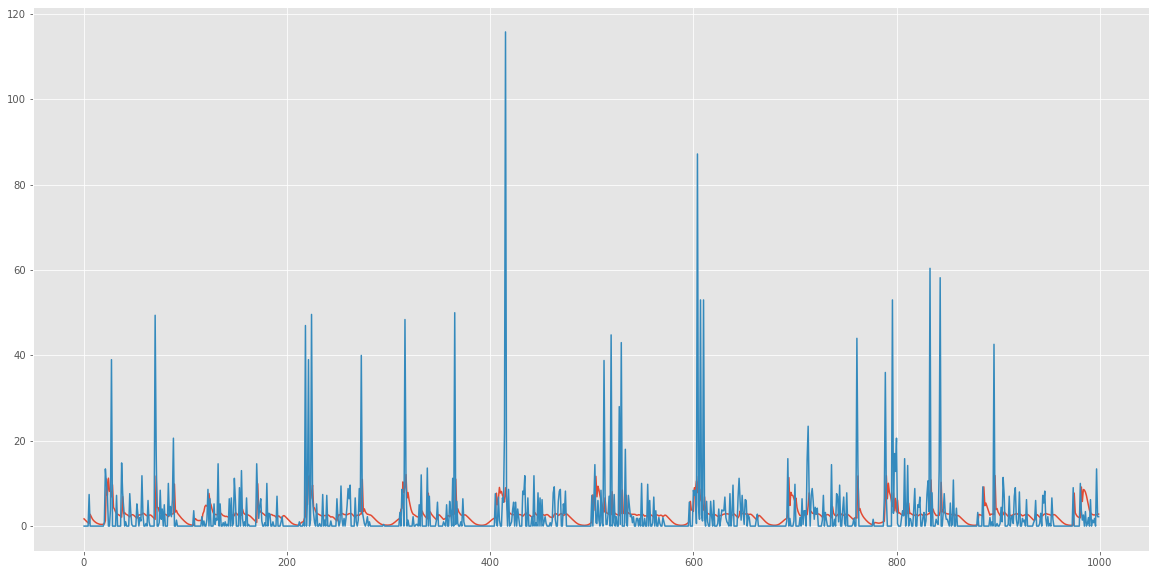

In [378]:
plt.plot(train_results['Train Predictions'][:1000])
plt.plot(train_results['Actuals'][:1000])